In [25]:
!pip install geopandas

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import geopandas as gpd
import random
import pickle

In [27]:
df = pd.read_pickle('in_mig')
in_df = pd.DataFrame(df[-1], columns= ['migration', 'ifips', 'jfips'], dtype= int)

In [91]:
#show me first 5 rows
in_df.head()

migration  ifips  jfips
0         73   1021   1001
1         50   1047   1001
2        356   1051   1001
3         56   1073   1001
4         16   1081   1001

In [106]:
in_df[(in_df['ifips'] == 1051) & (in_df['jfips'] == 1001)]

migration  ifips  jfips
2        356   1051   1001

In [29]:
# # get the first 1000 rows
# in_df = in_df[:1000]

# # remove all the ones that have 0 migration
# in_df = in_df[in_df['migration'] != 0]

In [30]:
# Create an empty directed graph
G = nx.DiGraph()

# Iterate through the rows in the DataFrame and add edges to the graph
for index, row in in_df.iterrows():
    source = int(row['ifips'])
    target = int(row['jfips'])
    weight = row['migration']
    G.add_edge(source, target, weight=weight)

# Print the graph's nodes and edges
print("Nodes:", G.nodes())
print("Edges:", G.edges(data=True))


Nodes: [1021, 1001, 1047, 1051, 1073, 1081, 1085, 1097, 1101, 1117, 8041, 48029, 51059, 1015, 1003, 1025, 1053, 1055, 1069, 1077, 1089, 1095, 1099, 1103, 1121, 1125, 1129, 6037, 6059, 6073, 12031, 12033, 12057, 12091, 12103, 12113, 13067, 13087, 13089, 13121, 13135, 17031, 22017, 22033, 22051, 22071, 22073, 22103, 26125, 28047, 28049, 28059, 28075, 32003, 47037, 47157, 48201, 48439, 1011, 1005, 1045, 1067, 1109, 1113, 13215, 13239, 1007, 1105, 1043, 1009, 1115, 1127, 1087, 1035, 1013, 1039, 1041, 1019, 1027, 1029, 1049, 1071, 1111, 12005, 13045, 13179, 13233, 15003, 21047, 22115, 36045, 37051, 45079, 47125, 48027, 48141, 53053, 1017, 1123, 13145, 13285, 13055, 13115, 1023, 1119, 1091, 1131, 1037, 13143, 1031, 1061, 6029, 36071, 1059, 1033, 1079, 1093, 1133, 28141, 12131, 1083, 2090, 12095, 13051, 48099, 51700, 26163, 13047, 13083, 13295, 47065, 48215, 1057, 1075, 28057, 12059, 12063, 1065, 1063, 12073, 12105, 13095, 13099, 18089, 47115, 1107, 4013, 4019, 5119, 6001, 6065, 6071, 6075, 8

In [31]:
# # Assuming G is your directed graph

# # Set the figure size
# plt.figure(figsize=(12, 8))

# # Draw the graph
# pos = nx.spring_layout(G, seed=42)  # Positions the nodes using the spring layout algorithm
# nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=400, edge_color='gray', arrows=True, font_size=8)
# nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{d['weight']}" for u, v, d in G.edges(data=True)}, font_size=8)

# # Display the plot
# plt.show()


## STATE level migrations  

In [32]:
# Rename the columns to match your actual column names if necessary
source_county_col = 'ifips'
target_county_col = 'jfips'
migration_col = 'migration'

# Define a function to extract the state FIPS code from a county FIPS code
def county_to_state_fips(county_fips):
    return int(str(county_fips).zfill(5)[:2])

# Create a new DataFrame with the state FIPS codes for each county FIPS code
in_df['source state'] = in_df[source_county_col].apply(county_to_state_fips)
in_df['target state'] = in_df[target_county_col].apply(county_to_state_fips)

# Group by source and target state FIPS codes and sum the migration values
state_migration = in_df.groupby(['source state', 'target state'])[migration_col].sum().reset_index()

# Rename the columns in the new DataFrame
state_migration.columns = ['source state', 'target state', 'migration']

# Display the new DataFrame
state_migration.tail()


source state  target state  migration
2389            56            48        234
2390            56            49        438
2391            56            51          0
2392            56            53         55
2393            56            56       4410

In [33]:
# Mapping to names
state_fips_to_code = {
    1: 'AL', 2: 'AK', 4: 'AZ', 5: 'AR', 6: 'CA', 8: 'CO', 9: 'CT', 10: 'DE', 11: 'DC', 12: 'FL', 13: 'GA',
    15: 'HI', 16: 'ID', 17: 'IL', 18: 'IN', 19: 'IA', 20: 'KS', 21: 'KY', 22: 'LA', 23: 'ME', 24: 'MD',
    25: 'MA', 26: 'MI', 27: 'MN', 28: 'MS', 29: 'MO', 30: 'MT', 31: 'NE', 32: 'NV', 33: 'NH', 34: 'NJ',
    35: 'NM', 36: 'NY', 37: 'NC', 38: 'ND', 39: 'OH', 40: 'OK', 41: 'OR', 42: 'PA', 44: 'RI', 45: 'SC',
    46: 'SD', 47: 'TN', 48: 'TX', 49: 'UT', 50: 'VT', 51: 'VA', 53: 'WA', 54: 'WV', 55: 'WI', 56: 'WY'
}

In [34]:
# Convert the state FIPS codes to state codes
state_migration['source state'] = state_migration['source state'].map(state_fips_to_code)
state_migration['target state'] = state_migration['target state'].map(state_fips_to_code)

# remove all the ones that have 0 migration
state_migration = state_migration[state_migration['migration'] != 0]

# Display the new DataFrame
state_migration.tail()

source state target state  migration
2387           WY           SD        131
2389           WY           TX        234
2390           WY           UT        438
2392           WY           WA         55
2393           WY           WY       4410

In [35]:
# Create an empty directed graph
G_state = nx.DiGraph()

# Iterate through the rows in the DataFrame and add edges to the graph
for index, row in state_migration.iterrows():
    source = row['source state']
    target = row['target state']
    weight = row['migration']
    G_state.add_edge(source, target, weight=weight)

# Print the graph's nodes and edges
print("Nodes:", G_state.nodes())
print("Edges:", G_state.edges(data=True))

Nodes: ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'DC', 'FL', 'GA', 'HI', 'IL', 'IN', 'KS', 'KY', 'LA', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'NE', 'NV', 'NY', 'NC', 'OH', 'OK', 'OR', 'PA', 'SC', 'TN', 'TX', 'UT', 'VA', 'WA', 'WI', 'CT', 'ID', 'ME', 'MT', 'NH', 'NJ', 'NM', 'ND', 'SD', 'WY', 'DE', 'IA', 'RI', 'VT', 'WV']
Edges: [('AL', 'AL', {'weight': 58426}), ('AL', 'AK', {'weight': 34}), ('AL', 'AZ', {'weight': 231}), ('AL', 'AR', {'weight': 38}), ('AL', 'CA', {'weight': 798}), ('AL', 'CO', {'weight': 225}), ('AL', 'DC', {'weight': 40}), ('AL', 'FL', {'weight': 4130}), ('AL', 'GA', {'weight': 6217}), ('AL', 'HI', {'weight': 109}), ('AL', 'IL', {'weight': 296}), ('AL', 'IN', {'weight': 88}), ('AL', 'KS', {'weight': 95}), ('AL', 'KY', {'weight': 99}), ('AL', 'LA', {'weight': 502}), ('AL', 'MD', {'weight': 105}), ('AL', 'MA', {'weight': 64}), ('AL', 'MI', {'weight': 255}), ('AL', 'MN', {'weight': 11}), ('AL', 'MS', {'weight': 1235}), ('AL', 'MO', {'weight': 76}), ('AL', 'NE', {'weight': 10}), (

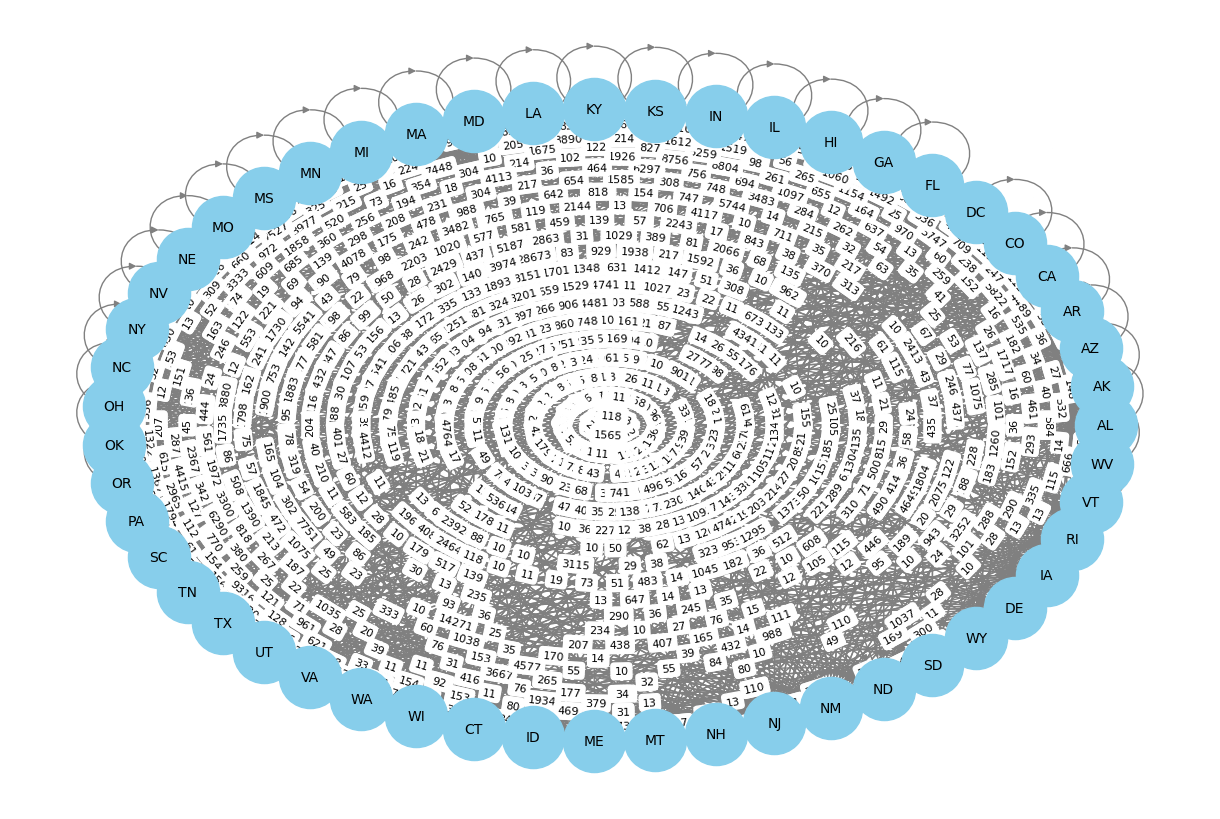

In [36]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Choose a layout algorithm
pos = nx.circular_layout(G_state)

# Draw the graph
nx.draw(G_state, pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='gray', arrows=True, font_size=10)
nx.draw_networkx_edge_labels(G_state, pos, edge_labels={(u, v): f"{d['weight']}" for u, v, d in G_state.edges(data=True)}, font_size=8)

# Display the plot
plt.show()


### Top edges 

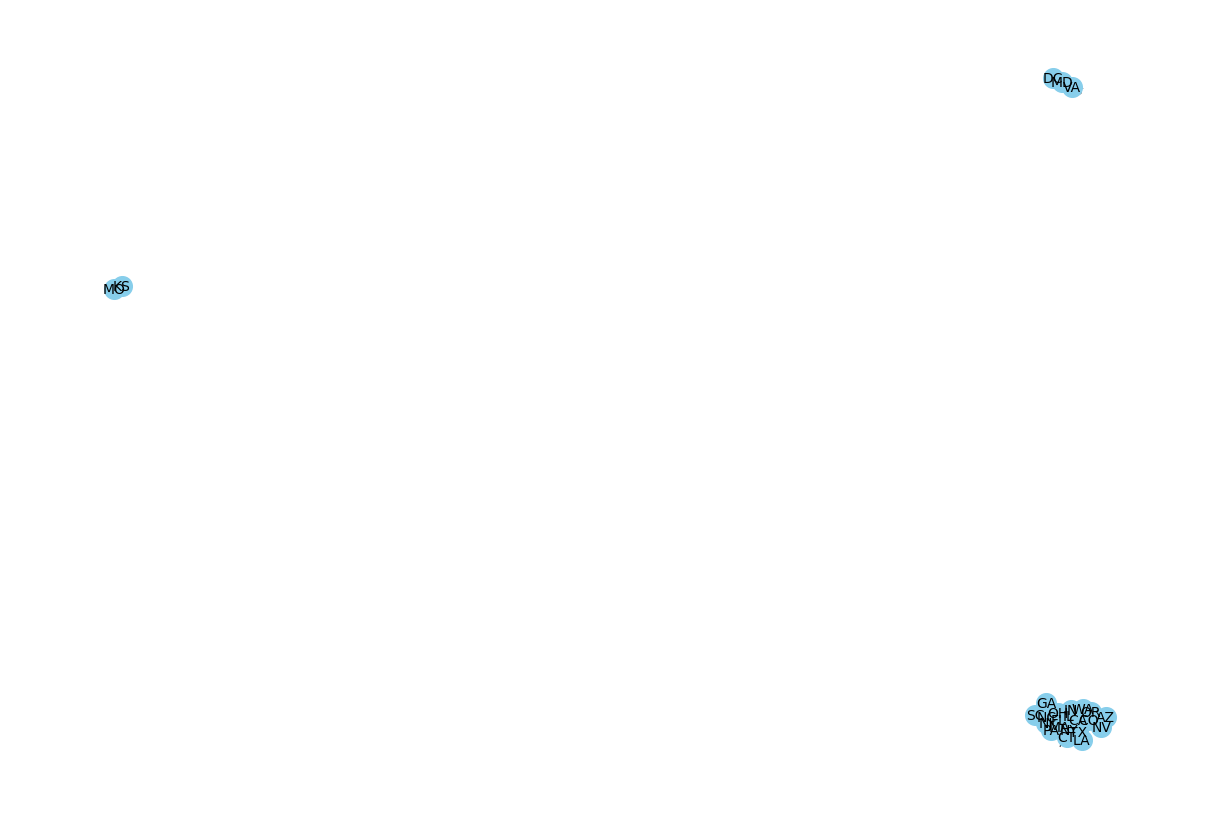

In [37]:
def top_n_edges(G, n):
    sorted_edges = sorted(
        ((u, v, d) for u, v, d in G.edges(data=True) if u != v),
        key=lambda x: x[2]['weight'],
        reverse=True,
    )
    return sorted_edges[:n]

# Choose a number of top edges to display
n_top_edges = 50

# Create a new graph with the top n edges
G_filtered = nx.DiGraph()
G_filtered.add_edges_from(top_n_edges(G_state, n_top_edges))

# Set the figure size
plt.figure(figsize=(12, 8))

# Choose the Kamada-Kawai force-directed layout algorithm
pos = nx.kamada_kawai_layout(G_filtered, weight='weight')

# Draw the filtered graph
nx.draw(G_filtered, pos, with_labels=True, node_color='skyblue', node_size=200, edge_color='gray', arrows=True, font_size=10)
nx.draw_networkx_edge_labels(G_filtered, pos, edge_labels={(u, v): f"{d['weight']}" for u, v, d in G_filtered.edges(data=True)}, font_size=8)

# Display the plot
plt.show()


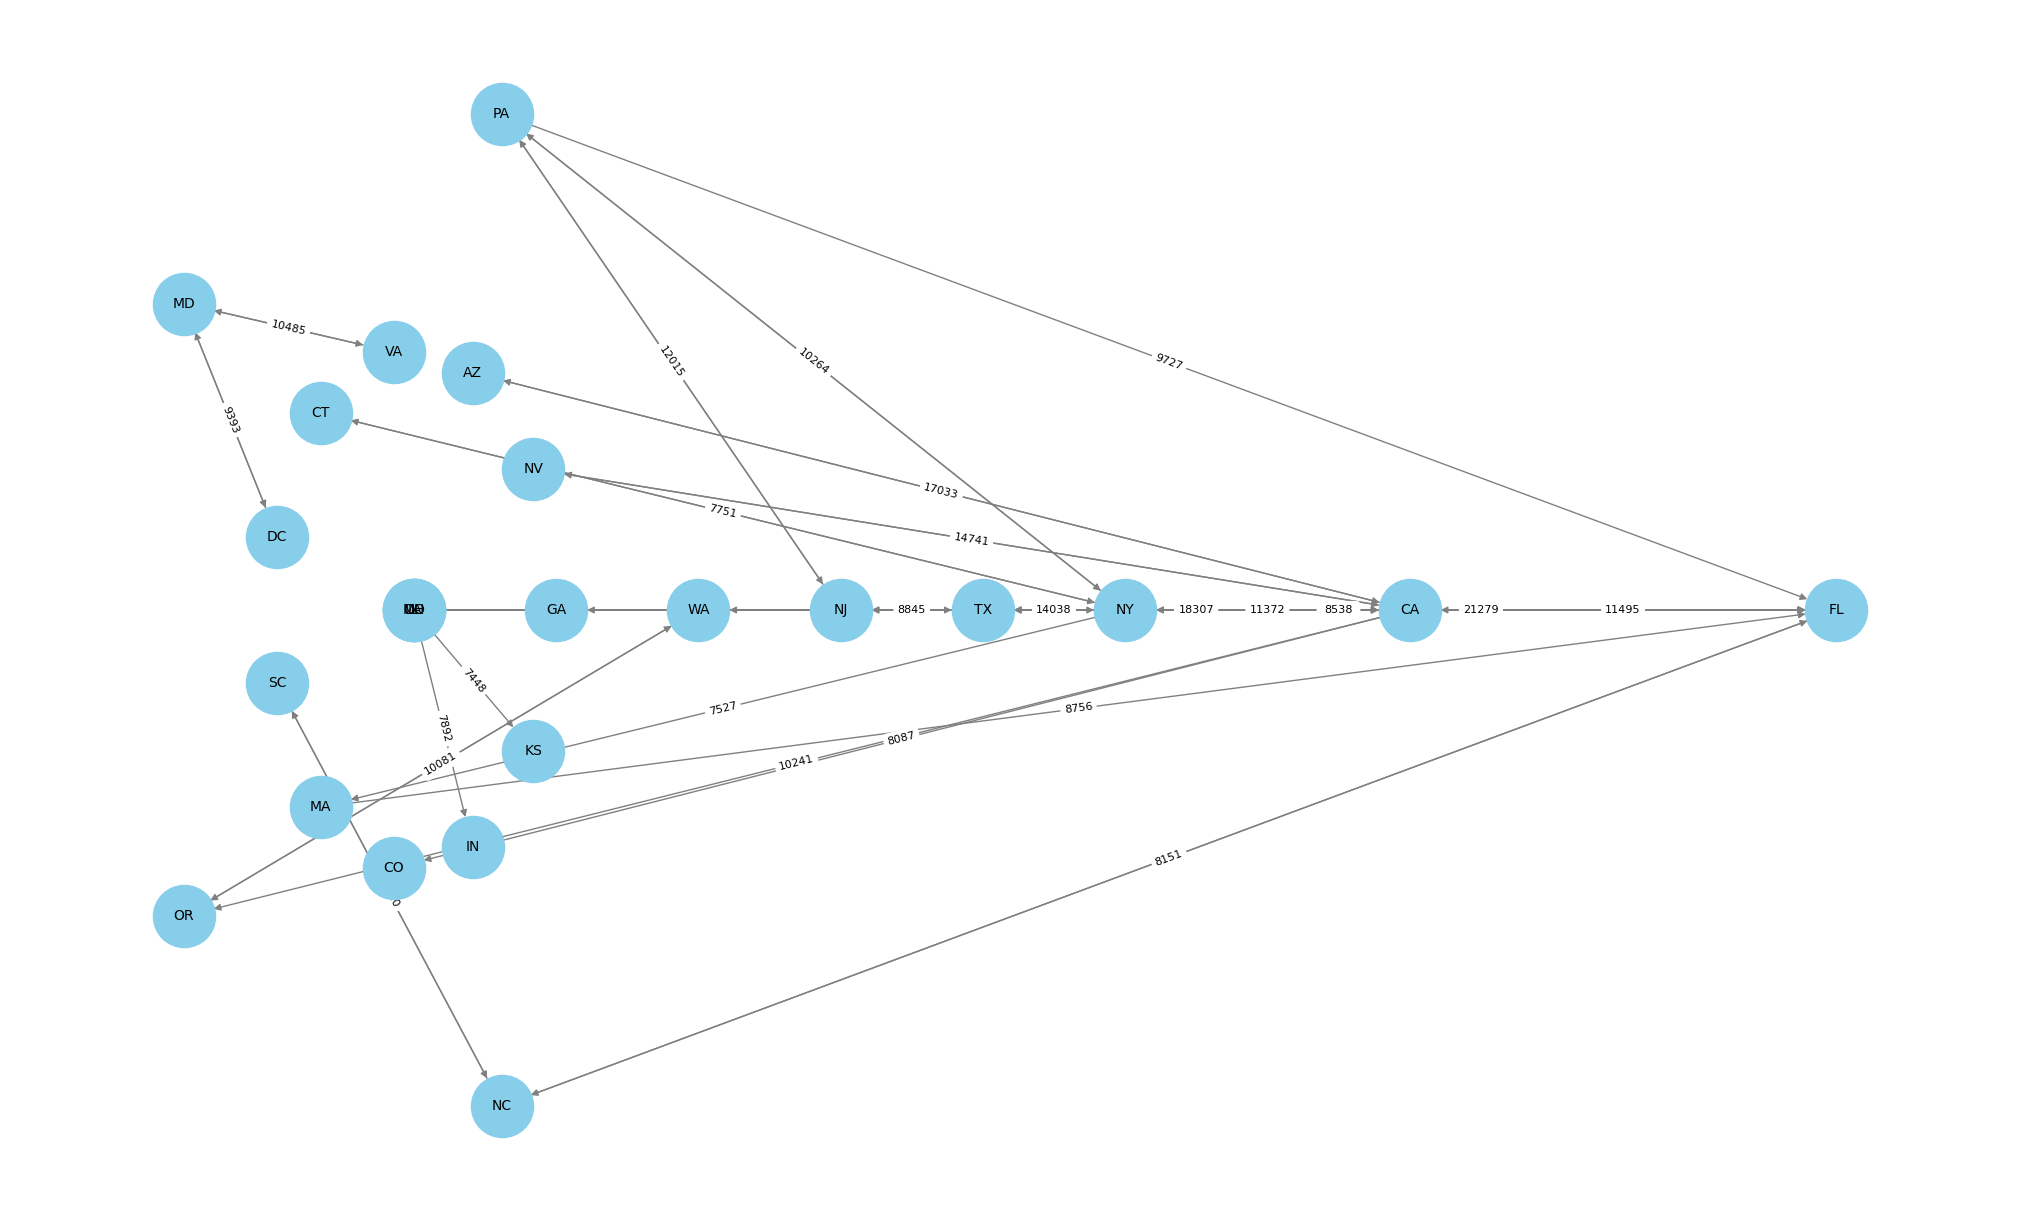

In [38]:
def custom_layout(G):
    nodes_in_degree = G.in_degree()
    max_in_degree = max(d for n, d in nodes_in_degree)
    nodes_by_degree = {i: [] for i in range(max_in_degree + 1)}
    for n, d in nodes_in_degree:
        nodes_by_degree[d].append(n)

    pos = {}
    for degree, nodes in nodes_by_degree.items():
        n_nodes = len(nodes)
        theta = np.linspace(0, 2 * np.pi, n_nodes + 1)[:-1]
        x = np.cos(theta) * degree
        y = np.sin(theta) * degree
        pos.update({n: (xi, yi) for n, xi, yi in zip(nodes, x, y)})

    return pos

# Set the figure size
plt.figure(figsize=(20, 12))

# Choose the custom layout
pos = custom_layout(G_filtered)

# Draw the filtered graph
nx.draw(G_filtered, pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='gray', arrows=True, font_size=10)
nx.draw_networkx_edge_labels(G_filtered, pos, edge_labels={(u, v): f"{d['weight']}" for u, v, d in G_filtered.edges(data=True)}, font_size=8)

# Display the plot
plt.show()


In [118]:
def create_subgraph(in_df, sample_size=5):

    # get set of all counties
    in_df = pd.DataFrame(df[-1], columns= ['migration', 'ifips', 'jfips'], dtype= int)
    all_counties_list = list(np.unique(np.append(in_df['ifips'].unique(), in_df['jfips'].unique())))
    graph_year = []

    found_county = False
    while not found_county:
        # randomly sample county
        rand_county = random.sample(all_counties_list, 1)[0]

        # get all edges which include random county
        temp_df = in_df[(in_df['ifips'] == rand_county) | (in_df['jfips'] == rand_county)]
        temp_df = temp_df[(temp_df['ifips'] != rand_county) | (temp_df['jfips'] != rand_county)]

        # dictionary of in and out
        other_counties = np.unique(np.append(temp_df['ifips'].unique(), temp_df['jfips'].unique()))
        total_migration = temp_df['migration'].sum()
        counties = []
        prob = []
        # county_to_prob = {}

        for county in other_counties:
            if county != rand_county:
                counties.append(county)
                prob.append((temp_df[(temp_df['ifips'] == county) | (temp_df['jfips'] == county)]['migration'].sum()) / total_migration)
        
        if (len(counties) > sample_size):
        # should be limited by population size...
            nodes = np.random.choice(counties, p=prob, size=sample_size, replace=False)
            nodes = np.append(nodes, rand_county)
            final_edges = temp_df[((temp_df['ifips'] == rand_county) & (temp_df['jfips'].isin(nodes))) | ((temp_df['ifips'].isin(nodes)) & (temp_df['jfips'] == rand_county))]
            final_edges = final_edges[['ifips', 'jfips', 'migration']]

            # Create random features for what the nodes shall look like
            max_disasters = 15
            dict_keys = ['stable_pop', 'num_disasters', 'disaster_1', 'disaster_2', 'disaster_3', 'disaster_4']        
            node_list = []

            for node in nodes:
                feat = []
                # feat.append(in_df[(in_df['ifips'] == node) & (in_df['jfips'] == node)]['migration'])
                feat.append(random.sample(range(1, 1000), 1)[0])
                num_disasters = random.sample(range(1, max_disasters), 1)[0]
                feat.append(num_disasters)
                feat = feat + random.choices(range(num_disasters), k=4)
                node_dict = dict(zip(dict_keys, feat))
                node_list.append((node, node_dict))

            # print(final_edges)
            final_G = nx.DiGraph()
            final_G.add_nodes_from(node_list)
            final_G.add_weighted_edges_from(final_edges.values.tolist(), weight='migration')

            found_county = True


    for i in range(df.shape[0] - 1):
        in_df = pd.DataFrame(df[i], columns= ['migration', 'ifips', 'jfips'], dtype= int)
        # get all edges which include random county
        temp_df = in_df[(in_df['ifips'] == rand_county) | (in_df['jfips'] == rand_county)]
        temp_df = temp_df[(temp_df['ifips'] != rand_county) | (temp_df['jfips'] != rand_county)]

        edges = temp_df[((temp_df['ifips'] == rand_county) & (temp_df['jfips'].isin(nodes))) | ((temp_df['ifips'].isin(nodes)) & (temp_df['jfips'] == rand_county))]
        edges = edges[['ifips', 'jfips', 'migration']]

        # Create random features for what the nodes shall look like
        max_disasters = 15
        dict_keys = ['stable_pop', 'num_disasters', 'disaster_1', 'disaster_2', 'disaster_3', 'disaster_4']        
        node_list = []

        for node in nodes:
            feat = []
            # feat.append(in_df[(in_df['ifips'] == node) & (in_df['jfips'] == node)]['migration'])
            feat.append(random.sample(range(1, 1000), 1)[0])
            num_disasters = random.sample(range(1, max_disasters), 1)[0]
            feat.append(num_disasters)
            feat = feat + random.choices(range(num_disasters), k=4)
            node_dict = dict(zip(dict_keys, feat))
            node_list.append((node, node_dict))


        sample_G = nx.DiGraph()
        sample_G.add_nodes_from(node_list)
        sample_G.add_weighted_edges_from(edges.values.tolist(), weight='migration')

        graph_year.append(sample_G)

    graph_year.append(final_G)
    return graph_year

In [121]:
subgraphs = []

for i in range(3):
    subgraphs.append(create_subgraph(in_df))

In [122]:
subgraphs[0][0].nodes(data=True)

NodeDataView({39025: {'stable_pop': 338, 'num_disasters': 8, 'disaster_1': 2, 'disaster_2': 0, 'disaster_3': 0, 'disaster_4': 6}, 39027: {'stable_pop': 605, 'num_disasters': 5, 'disaster_1': 0, 'disaster_2': 3, 'disaster_3': 0, 'disaster_4': 1}, 39141: {'stable_pop': 445, 'num_disasters': 8, 'disaster_1': 4, 'disaster_2': 3, 'disaster_3': 3, 'disaster_4': 1}, 39113: {'stable_pop': 863, 'num_disasters': 12, 'disaster_1': 9, 'disaster_2': 10, 'disaster_3': 9, 'disaster_4': 5}, 39001: {'stable_pop': 51, 'num_disasters': 9, 'disaster_1': 8, 'disaster_2': 4, 'disaster_3': 8, 'disaster_4': 8}, 39071: {'stable_pop': 564, 'num_disasters': 8, 'disaster_1': 1, 'disaster_2': 1, 'disaster_3': 7, 'disaster_4': 6}})

In [115]:
graph_year[0].edges(data=True)

OutEdgeDataView([(6037, 6093, {'migration': 83}), (41029, 6093, {'migration': 24}), (6089, 6093, {'migration': 70}), (6041, 6093, {'migration': 13}), (6013, 6093, {'migration': 21}), (6093, 6037, {'migration': 26}), (6093, 6089, {'migration': 151}), (6093, 41029, {'migration': 63}), (6093, 6013, {'migration': 11})])

In [116]:
graph_year[0].nodes(data=True)

NodeDataView({6037: {'stable_pop': 835, 'num_disasters': 6, 'disaster_1': 2, 'disaster_2': 3, 'disaster_3': 1, 'disaster_4': 4}, 41029: {'stable_pop': 648, 'num_disasters': 8, 'disaster_1': 2, 'disaster_2': 7, 'disaster_3': 5, 'disaster_4': 2}, 6089: {'stable_pop': 320, 'num_disasters': 3, 'disaster_1': 0, 'disaster_2': 2, 'disaster_3': 0, 'disaster_4': 2}, 6041: {'stable_pop': 651, 'num_disasters': 11, 'disaster_1': 8, 'disaster_2': 10, 'disaster_3': 0, 'disaster_4': 2}, 6013: {'stable_pop': 103, 'num_disasters': 11, 'disaster_1': 7, 'disaster_2': 5, 'disaster_3': 1, 'disaster_4': 8}, 6093: {'stable_pop': 271, 'num_disasters': 10, 'disaster_1': 5, 'disaster_2': 1, 'disaster_3': 9, 'disaster_4': 8}})

In [123]:
with open('./sample_graphs', 'wb') as f:
    pickle.dump(subgraphs, f)

In [7]:
disasters = pd.read_pickle('disasters.pickle')['1991']
# disasters = pd.DataFrame(df[-1], columns= ['migration', 'ifips', 'jfips'], dtype= int)


In [9]:
disasters.columns

Index(['disasterNumber', 'declarationType', 'declarationDate', 'fyDeclared',
       'incidentType', 'declarationTitle', 'ihProgramDeclared',
       'iaProgramDeclared', 'paProgramDeclared', 'hmProgramDeclared',
       'incidentBeginDate', 'incidentEndDate', 'disasterCloseoutDate', 'fips',
       'disasters'],
      dtype='object')

In [13]:
dis = disasters[['fips', 'disasters', 'ihProgramDeclared',
       'iaProgramDeclared', 'paProgramDeclared', 'hmProgramDeclared' ]]

In [22]:
dis.groupby('fips').sum()

disasters  ihProgramDeclared  iaProgramDeclared  paProgramDeclared  \
fips                                                                        
01033          1                  0                  1                  1   
01043          1                  0                  1                  1   
01059          1                  0                  1                  1   
01071          1                  0                  1                  0   
01077          1                  0                  1                  1   
...          ...                ...                ...                ...   
64002          1                  0                  1                  1   
64040          1                  0                  1                  1   
64060          1                  0                  1                  1   
66010          1                  0                  1                  1   
70000          1                  0                  1                  1   

       hmProgramDeclared  
fips                      
01033                  0  
01043                  0  
01059                  0  
01071                  0  
01077                  0  
...                  ...  
64002                  0  
64040                  0  
64060                  0  
66010                  0  
70000                  0  

[443 rows x 5 columns]

In [12]:
disasters[disasters['fips'] == "02000"]

disasterNumber declarationType           declarationDate  fyDeclared  \
0             2078              FM  1991-07-03T00:00:00.000Z        1991   
68             909              DR  1991-05-30T00:00:00.000Z        1991   

   incidentType                 declarationTitle  ihProgramDeclared  \
0          Fire              APPEL MOUNTAIN FIRE                  0   
68    Snowstorm  HEAVY SNOW, ICE JAMS & FLOODING                  0   

    iaProgramDeclared  paProgramDeclared  hmProgramDeclared  \
0                   0                  1                  0   
68                  0                  1                  0   

           incidentBeginDate           incidentEndDate  \
0   1991-07-01T00:00:00.000Z  1991-12-09T00:00:00.000Z   
68  1991-04-15T00:00:00.000Z  1991-05-25T00:00:00.000Z   

        disasterCloseoutDate   fips  disasters  
0   1993-11-30T00:00:00.000Z  02000          1  
68  1998-06-22T00:00:00.000Z  02000          1

In [11]:
print(disasters[['fips', 'disasterNumber', 'iaProgramDeclared', 'paProgramDeclared', 'hmProgramDeclared']][])

      fips  disasterNumber  iaProgramDeclared  paProgramDeclared  \
0    02000            2078                  0                  1   
1    08000            2077                  0                  1   
2    36103             918                  0                  1   
3    33003             917                  0                  1   
4    33011             917                  0                  1   
..     ...             ...                ...                ...   
516  13163             880                  1                  1   
517  13167             880                  1                  1   
518  13189             880                  1                  1   
519  13245             880                  1                  1   
520  13251             880                  1                  1   

     hmProgramDeclared  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
..                 ...  
516     